In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
total_df.head()
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [95]:
# Checking the number of mice.
len(total_df['Mouse ID'].value_counts())

249

In [96]:
duplicate_df = total_df.loc[total_df['Mouse ID'] == 'g989']
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [97]:
#taking out the duplicated value
cleaned_df = total_df.loc[total_df['Mouse ID'] != 'g989']


#grouping by drug regimen for summary table
clean_group = cleaned_df.groupby(cleaned_df['Drug Regimen'])
clean_group.mean()
tumor_mean = clean_group['Tumor Volume (mm3)'].mean()
tumor_median = clean_group['Tumor Volume (mm3)'].median()
tumor_var = clean_group['Tumor Volume (mm3)'].var()
tumor_std = clean_group['Tumor Volume (mm3)'].std()
tumor_sem = clean_group['Tumor Volume (mm3)'].sem()

#create a dataframe of all the info

tumor_summary_df = {'Tumor Volume Mean': tumor_mean,
                'Tumor Volume Median': tumor_median,
                'Tumor Volume Variance': tumor_var,
                'Tumor Volume Standard Deviation': tumor_std,
                'Tumor Volume Standard Error': tumor_sem}
tumor_summary_df = pd.DataFrame(tumor_summary_df)

tumor_summary_fast = clean_group['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'], axis=0)
tumor_summary_fast

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
cleaned_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [99]:
drug_list = clean_group['Drug Regimen']
meas_num = clean_group['Mouse ID'].count()

plot_df = {'Drug List': drug_list,
           'Total Number of Measurements': meas_num}
plot1_df = pd.DataFrame(plot_df)
plot1_df = plot1_df.sort_values(by=['Total Number of Measurements'], ascending=False)

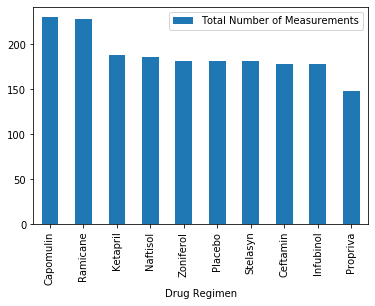

In [100]:
#graph using pandas 
aa = plot1_df.plot.bar(rot=90)

In [101]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [102]:
#creates a list with all the info needed for pie chart on genders
pie_meas = cleaned_df['Sex'].value_counts()
labels = ['Female', 'Male']


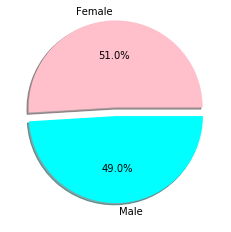

In [103]:
#time to plot the piechart
explode = (0.1, 0)
plt.pie(pie_meas,labels=labels, autopct="%1.1f%%", shadow=True, colors=['Pink', 'Cyan'], explode=explode)
plt.show()

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Create a new DF of just Capomulin, Ramicane, Infubinol, and Ceftamin
top4_df = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') | (cleaned_df['Drug Regimen'] == 'Ramicane') | (cleaned_df['Drug Regimen'] == 'Infubinol') |(cleaned_df['Drug Regimen'] == 'Ceftamin') ]
top4_df.head()                         

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [107]:
mouse_max_group = top4_df.groupby('Mouse ID')
mouse_max_group = mouse_max_group['Timepoint'].max()
mouse_maxes = pd.DataFrame(mouse_max_group).copy()
mouse_maxes

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [110]:
top4_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [116]:
#merge dfs on mouse id AND timepoint so you end up with the right ammount of mice
mouse_max_and_tumor = pd.merge(mouse_maxes, top4_df, how='left', on=['Mouse ID','Timepoint'])
mouse_max_and_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [117]:
#check to make sure only one of each mouse is being counted
mouse_max_and_tumor['Mouse ID'].value_counts()

k483    1
e662    1
v719    1
q132    1
z581    1
       ..
y769    1
f345    1
a685    1
i738    1
r554    1
Name: Mouse ID, Length: 100, dtype: int64

In [146]:
# Put treatments into a list for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

#create 
capomulin_vol = []
capomulin_vol = mouse_max_and_tumor[mouse_max_and_tumor['Drug Regimen'] == 'Capomulin']
capomulin_volumes = capomulin_vol['Tumor Volume (mm3)']
capomulin_volumes

ramicane_vol = []
ramicane_vol = mouse_max_and_tumor[mouse_max_and_tumor['Drug Regimen'] == 'Ramicane']
ramicane_volumes = ramicane_vol['Tumor Volume (mm3)']
ramicane_volumes

infubinol_vol = []
infubinol_vol = mouse_max_and_tumor[mouse_max_and_tumor['Drug Regimen'] == 'Infubinol']
infubinol_volumes = infubinol_vol['Tumor Volume (mm3)']
infubinol_volumes

ceftamin_vol = []
ceftamin_vol = mouse_max_and_tumor[mouse_max_and_tumor['Drug Regimen'] == 'Ceftamin']
ceftamin_volumes = ceftamin_vol['Tumor Volume (mm3)']
ceftamin_volumes

all_top4 = [capomulin_volumes, ramicane_volumes, infubinol_volumes, ceftamin_volumes]

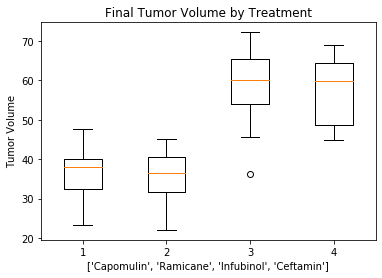

In [148]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume')
ax1.set_title('Final Tumor Volume by Treatment')
ax1.set_xlabel(treatments) 
ax1.boxplot(all_top4)
plt.show()

In [152]:
#picking a random mouse to sample
capo_mouse = capomulin_vol.sample(1)
capo_mouse


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
65,r554,45,Capomulin,Female,8,17,32.377357,3


In [156]:
#grabbing the info of the mouse from the main DF
capo_mouse_df = top4_df.loc[top4_df['Mouse ID'] == 'r554']
capo_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
125,r554,Capomulin,Female,8,17,0,45.000000,0
126,r554,Capomulin,Female,8,17,5,45.781746,1
127,r554,Capomulin,Female,8,17,10,39.005494,2
128,r554,Capomulin,Female,8,17,15,35.463758,2
129,r554,Capomulin,Female,8,17,20,36.015589,2
130,r554,Capomulin,Female,8,17,25,33.893345,3
131,r554,Capomulin,Female,8,17,30,32.680655,3
132,r554,Capomulin,Female,8,17,35,33.069337,3
133,r554,Capomulin,Female,8,17,40,31.804841,3
134,r554,Capomulin,Female,8,17,45,32.377357,3


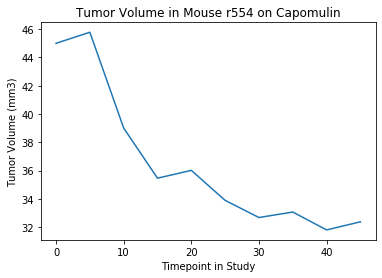

In [169]:
#create plot of mouse r554 in study
plt.plot(capo_mouse_df['Timepoint'], capo_mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint in Study')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume in Mouse r554 on Capomulin')
plt.show()

In [166]:
#grab all info on mice with capomulin treatment
capo_mice = top4_df[top4_df['Drug Regimen'] == 'Capomulin']
capo_group = capo_mice.groupby('Mouse ID').mean()

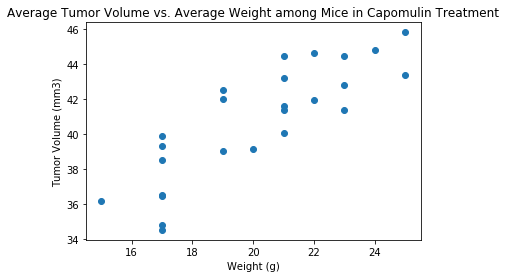

In [172]:
plt.scatter(capo_group['Weight (g)'], capo_group['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Average Weight among Mice in Capomulin Treatment')
plt.show()

In [184]:
corr = np.corrcoef(capo_group['Weight (g)'], capo_group['Tumor Volume (mm3)'])
corr = corr[0][1]
print('The correlation between mouse weight and the average tumor volume is: ' + str(corr))


vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(capo_group['Weight (g)'], capo_group['Tumor Volume (mm3)'])
vc_fit = vc_slope * capo_group['Weight (g)'] + vc_int

The correlation between mouse weight and the average tumor volume is: 0.8419363424694719


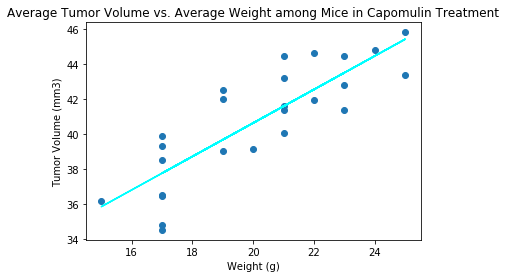

In [197]:
plt.scatter(capo_group['Weight (g)'], capo_group['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Average Weight among Mice in Capomulin Treatment')

plt.plot(capo_group['Weight (g)'],vc_fit,"-", color='cyan')

plt.show()